In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# KMeans 군집화
from sklearn.cluster import KMeans

# 위도, 경도 계산
# haversine 설치해줘야 함 !
#!pip install haversine
from haversine import haversine

# 순열
from itertools import permutations

# 진행과정
from tqdm import tqdm_notebook
# 3. 계층적 군집분석 model
from scipy.cluster.hierarchy import linkage, dendrogram


import pandas as pd # dataset load
from sklearn.cluster import KMeans # model
import matplotlib.pyplot as plt # 시각화

In [54]:
wondu = pd.read_csv("data/wondu.csv")
wondu

,원두번호,원산지,원두이름,로스팅,아로마,산도,단맛,쓴맛,바디감,랭킹
0,1,에티오피아,에티오피아 아리차 내추럴 g1 스페셜티,하이 로스팅,"베리향, 꽃향.,살구향",4.0,3.5,2.0,2.5,1
1,2,인도,인도 마이소르 너깃 엑스트라 볼드,시티 로스팅,"매운향,초콜릿향",4.0,3.0,3.5,3.5,2
2,3,인도네시아,인도네시아 만델링 g1,풀시티 로스팅,"초콜릿향,견과류향",2.0,3.0,4.0,4.0,3
3,4,르완다,르완다 버번,풀시티 로스팅,"초콜릿향,과일향,견과류향",3.0,3.5,3.0,3.0,4
4,5,코스타리카,코스타리가 따라주 SHB,시티 로스팅,"과일향,견과류향",3.0,3.5,3.0,3.0,5
5,6,브라질,브라질 세하도 파인컵 NY2,시티 로스팅,"카라멜향,견과류향",2.0,3.0,2.5,3.0,6
6,7,탄자니아,탄자니아 AA,풀시티 로스팅,과일향,3.5,3.5,3.0,3.0,7
7,8,파푸아 뉴기니,파푸아 뉴기니A,풀시티 로스팅,"초콜릿향,견과류향",2.0,3.0,3.5,3.0,8
8,9,엘살바도르,엘살바도르 SHG,시티 로스팅,"과일향,초콜릿향",2.5,3.0,2.0,3.0,9
9,10,파나마,파나마 에스메랄다 팔미라 에스테이트 스페셜,시티 로스팅,"과일향,초콜릿향",3.5,4.0,2.0,3.0,10


In [55]:
#coffee = pd.get_dummies(wondu)
wondu["로스팅"].replace("하이 로스팅", 1, inplace = True)
wondu["로스팅"].replace("미디움 로스팅", 2, inplace = True)
wondu["로스팅"].replace("시티 로스팅", 3, inplace = True)
wondu["로스팅"].replace(" 시티 로스팅", 3, inplace = True)
wondu["로스팅"].replace("풀시티 로스팅", 4, inplace = True)

In [56]:
wondu

,원두번호,원산지,원두이름,로스팅,아로마,산도,단맛,쓴맛,바디감,랭킹
0,1,에티오피아,에티오피아 아리차 내추럴 g1 스페셜티,1,"베리향, 꽃향.,살구향",4.0,3.5,2.0,2.5,1
1,2,인도,인도 마이소르 너깃 엑스트라 볼드,3,"매운향,초콜릿향",4.0,3.0,3.5,3.5,2
2,3,인도네시아,인도네시아 만델링 g1,4,"초콜릿향,견과류향",2.0,3.0,4.0,4.0,3
3,4,르완다,르완다 버번,4,"초콜릿향,과일향,견과류향",3.0,3.5,3.0,3.0,4
4,5,코스타리카,코스타리가 따라주 SHB,3,"과일향,견과류향",3.0,3.5,3.0,3.0,5
5,6,브라질,브라질 세하도 파인컵 NY2,3,"카라멜향,견과류향",2.0,3.0,2.5,3.0,6
6,7,탄자니아,탄자니아 AA,4,과일향,3.5,3.5,3.0,3.0,7
7,8,파푸아 뉴기니,파푸아 뉴기니A,4,"초콜릿향,견과류향",2.0,3.0,3.5,3.0,8
8,9,엘살바도르,엘살바도르 SHG,3,"과일향,초콜릿향",2.5,3.0,2.0,3.0,9
9,10,파나마,파나마 에스메랄다 팔미라 에스테이트 스페셜,3,"과일향,초콜릿향",3.5,4.0,2.0,3.0,10


In [57]:
#wondu.drop(["해시태그"], axis = 1, inplace=True)
wondu.drop(["원산지"], axis = 1, inplace=True)
wondu.drop(["원두이름"], axis = 1, inplace=True)
wondu.drop(["아로마"], axis = 1, inplace=True)
#wondu.drop([""], axis = 1, inplace=True)
#wondu.drop(["해시태그"], axis = 1, inplace=True)

In [87]:
cols = list(wondu.columns)
wondu_x = wondu[cols[:7]]
wondu_x.head()

,원두번호,로스팅,산도,단맛,쓴맛,바디감,랭킹
0,1,1,4.0,3.5,2.0,2.5,1
1,2,3,4.0,3.0,3.5,3.5,2
2,3,4,2.0,3.0,4.0,4.0,3
3,4,4,3.0,3.5,3.0,3.0,4
4,5,3,3.0,3.5,3.0,3.0,5


In [88]:
wondu["로스팅"].value_counts()

3    8
4    7
2    2
1    1
Name: 로스팅, dtype: int64

In [89]:
# 2. y변수 수치화
#X, y = wondu(return_X_y=True)

# 사이킷런 라이브러리에서 제공하는 데이터셋을 불러오면 범주값을 숫자로 받을 수 있음
#y  # 0,1,2로 구성됨

In [90]:
wondu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   원두번호     18 non-null     int64  
 1   로스팅      18 non-null     int64  
 2   산도       18 non-null     float64
 3   단맛       18 non-null     float64
 4   쓴맛       18 non-null     float64
 5   바디감      18 non-null     float64
 6   랭킹       18 non-null     int64  
 7   cluster  18 non-null     int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 1.2 KB


In [91]:
# 3. 계층적 군집분석 model
clusters = linkage(y=wondu, method='complete', metric='euclidean')
clusters
clusters.shape # (149, 4)
# '''
# 연결방식 
# 1. 단순연결방식(single)
# 2. 완전연결방식(complete)
# 3. 평균연결방식(average)
# '''

(17, 4)

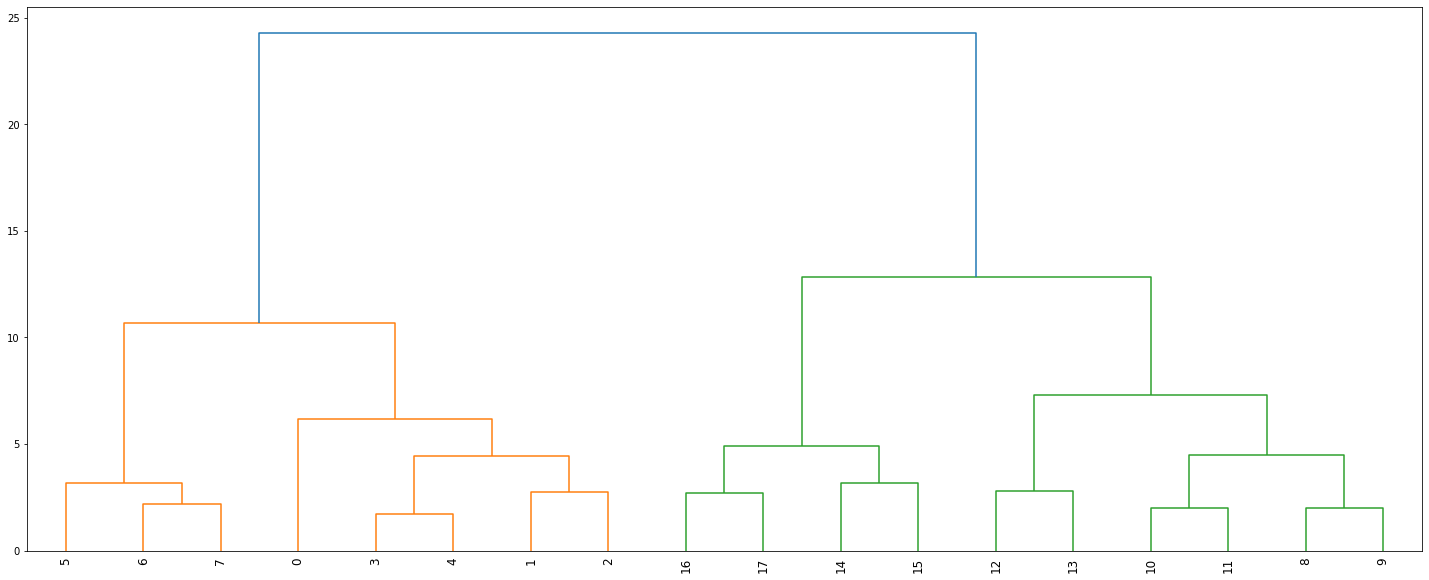

In [63]:
# 4. 덴드로그램 시각화 : 군집수 결정
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
# leaf_rotation=90 : 글자 각도
# leaf_font_size=20 : 글자 사이즈
plt.show() 

In [64]:

# 5. 클러스터링(군집) 결과
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

In [65]:
cut_tree = fcluster(clusters, t=3, criterion='distance')
cut_tree # prediction

array([ 5,  4,  4,  3,  3,  2,  1,  1, 11, 11, 10, 10,  9,  9,  7,  8,  6,
        6], dtype=int32)

In [66]:
labels = wondu['원두번호'] # 정답

df = pd.DataFrame({'pred':cut_tree, 'labels':labels})

con_mat = pd.crosstab(df['pred'], df['labels'])
con_mat

labels,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
pred,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [67]:
# wondu에 군집 예측치 추가
wondu.head()
wondu['cluster'] = cut_tree
wondu.head()

,원두번호,로스팅,산도,단맛,쓴맛,바디감,랭킹,cluster
0,1,1,4.0,3.5,2.0,2.5,1,5
1,2,3,4.0,3.0,3.5,3.5,2,4
2,3,4,2.0,3.0,4.0,4.0,3,4
3,4,4,3.0,3.5,3.0,3.0,4,3
4,5,3,3.0,3.5,3.0,3.0,5,3


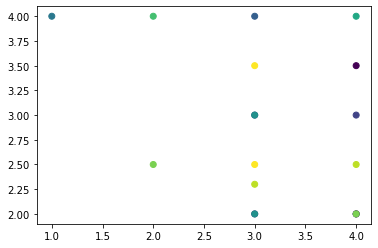

In [68]:
# 클러스터 단위 산점도 시각화
plt.scatter(x=wondu['로스팅'], y=wondu['산도'], c=wondu['cluster'])

In [69]:
# 클러스터 빈도수
wondu['cluster'].value_counts()


11    2
10    2
9     2
6     2
4     2
3     2
1     2
8     1
7     1
5     1
2     1
Name: cluster, dtype: int64

In [70]:
# 각 클러스터별 통계(평균)
cluster_g = wondu.groupby('cluster')
cluster_g.mean()

,원두번호,로스팅,산도,단맛,쓴맛,바디감,랭킹
cluster,,,,,,,
1,7.5,4.0,2.75,3.25,3.25,3.00,7.5
2,6.0,3.0,2.00,3.00,2.50,3.00,6.0
3,4.5,3.5,3.00,3.50,3.00,3.00,4.5
4,2.5,3.5,3.00,3.00,3.75,3.75,2.5
5,1.0,1.0,4.00,3.50,2.00,2.50,1.0
6,17.5,3.0,2.50,2.50,2.50,2.75,17.5
7,15.0,4.0,4.00,3.00,3.00,4.00,15.0
8,16.0,2.0,4.00,5.00,3.00,4.00,16.0
9,13.5,3.0,2.25,4.50,2.75,4.25,13.5


In [71]:
wondu1 = pd.read_csv("data/coffe.csv")
wondu1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   원두번호    18 non-null     int64  
 1   원산지     18 non-null     object 
 2   원두이름    18 non-null     object 
 3   로스팅     18 non-null     object 
 4   아로마     18 non-null     object 
 5   산도      18 non-null     float64
 6   단맛      18 non-null     float64
 7   쓴맛      18 non-null     float64
 8   바디감     18 non-null     float64
 9   랭킹      18 non-null     int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 1.5+ KB


In [73]:
wonduDF = wondu[['로스팅', '산도', '단맛', '쓴맛']]  # 두 개의 칼럼만 이용
wonduDF.head()

,로스팅,산도,단맛,쓴맛
0,1,4.0,3.5,2.0
1,3,4.0,3.0,3.5
2,4,2.0,3.0,4.0
3,4,3.0,3.5,3.0
4,3,3.0,3.5,3.0


In [74]:
# 2. 비계층적 군집 분석 model
model = KMeans(n_clusters=3, random_state=0, algorithm='auto')
# n_clusters=3 : 군집의 개수 (k) (이미 알고 있음)
# random_state=0 : seed 역할 (모델을 일정하게 생성 = 랜덤X)
model.fit(wonduDF)

KMeans(n_clusters=3, random_state=0)

In [75]:
# 3. 클러스터링(군집) 결과
pred = model.predict(wonduDF)
pred
len(pred) # 150 (관측치 개수만큼 예측치 생성됨)

18

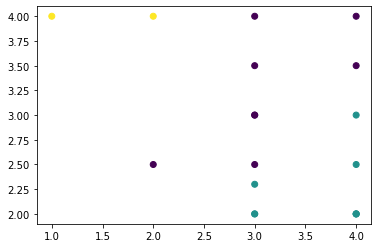

In [77]:

# 4. 군집결과 시각화
plt.scatter(x=wonduDF['로스팅'], y=wonduDF['산도'], c=pred)

In [78]:
# 군집별 중앙값
centers = model.cluster_centers_
centers

array([[3.125 , 3.25  , 3.375 , 2.625 ],
       [3.625 , 2.225 , 3.2875, 3.1875],
       [1.5   , 4.    , 4.25  , 2.5   ]])

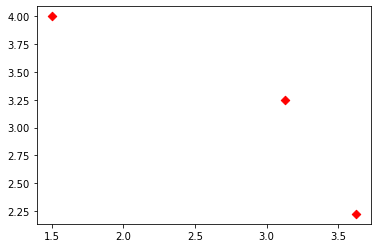

In [79]:
# 군집별 중앙값 시각화
plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
# marker='D', c='r' : 마커 모양은 Diamond, 색깔은 red
plt.show()

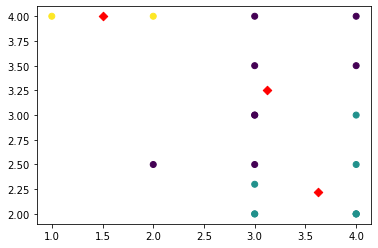

In [80]:
# 군집결과와 중앙값 함께 시각화

plt.scatter(x=wonduDF['로스팅'], y=wonduDF['산도'], c=pred) 

plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
plt.show() 

# 블럭 실행

In [81]:
# dataset 생성 함수
def loadDataSet(fileName) :
    rows = [] # 전체 행(80개)
    f = open(fileName, mode='r')
    
    lines = f.readlines()  # 줄단위 전체 행 읽기
    
    for row in lines :   # 줄 단위 읽기 : 1.658985 4.285136
        line = row.split('\t')  # '1.658985' '4.285136'
        row = []  # 1줄 행
        for l in line :
            row.append( float(l) )  # ['1.658985', '4.285136']
    
        rows.append(row)  # [['1.658985', '4.285136'], .... ]
    
    return np.array(rows)  # 2차원(80, 2) 행렬 구조로 return

In [85]:
dataDF = pd.DataFrame(wondu, columns = ['x', 'y'])
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       0 non-null      float64
 1   y       0 non-null      float64
dtypes: float64(2)
memory usage: 416.0 bytes


In [86]:
# 3. kMeans model
model = KMeans(n_clusters=4, algorithm='auto') # k = 4
model.fit(dataDF)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').